# Import Statements

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from keras.datasets import cifar10


# Gether data

In [2]:
label = 	["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# shape of data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

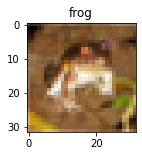

In [5]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train[0])
plt.title(label[y_train[0][0]])
plt.show()

In [6]:
# flatting the layer

x_train, x_test = x_train/255.0, x_test/255.0

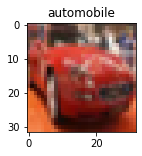

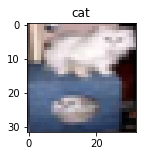

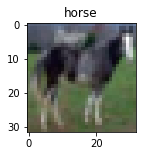

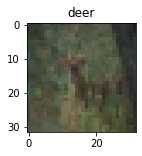

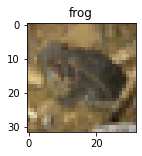

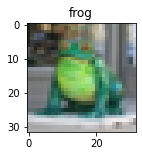

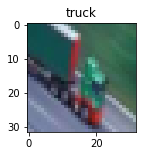

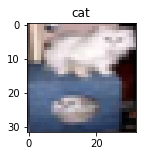

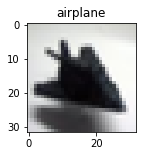

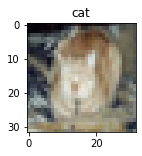

In [7]:
import random
for i in range(10):
  num = random.randint(1, 55)
  plt.figure(figsize=(2, 2))
  plt.imshow(x_train[num])
  plt.title(label[y_train[num][0]])
  plt.show()

# Creating CNN Layers

In [8]:
model = keras.models.Sequential()

In [9]:
# Adding Convolutional Layers 
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [10]:
# dropOut layers
model.add(keras.layers.Dropout(0.5))

In [11]:
# Adding Convolutional Layers 
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

In [12]:
# maxpool layers parameters
model.add(keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [13]:
# dropOut layers
model.add(keras.layers.Dropout(0.4))

In [14]:
# Adding Convolutional Layers 
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [15]:
# Adding Convolutional Layers 
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layers parameters
model.add(keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [16]:
# dropOut layers
model.add(keras.layers.Dropout(0.4))

In [17]:
model.add(keras.layers.Flatten())

In [18]:
# adding Danse Layers

model.add(keras.layers.Dense(units=128, activation='relu'))

In [19]:
# output layers

model.add(keras.layers.Dense(units=10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

## Training and Evaluation

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [22]:
# fitting the model

model.fit(x_train, y_train, epochs=12, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 20s 11ms/step - loss: 1.5826 - sparse_categorical_accuracy: 0.4227 - val_loss: 1.3422 - val_sparse_categorical_accuracy: 0.5191
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1926 - sparse_categorical_accuracy: 0.5728 - val_loss: 1.0724 - val_sparse_categorical_accuracy: 0.6173
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0354 - sparse_categorical_accuracy: 0.6329 - val_loss: 0.9665 - val_sparse_categorical_accuracy: 0.6596
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9512 - sparse_categorical_accuracy: 0.6620 - val_loss: 0.9405 - val_sparse_categorical_accuracy: 0.6668
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8780 - sparse_categorical_accuracy: 0.6902 - val_loss: 0.8554 - val_sparse_categorical_accuracy: 0.6978
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8385 - sp

In [23]:
# Evaluation Training datasets the Model

model.evaluate(x_train, y_train)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.4208 - sparse_categorical_accuracy: 0.8545


[0.4207727015018463, 0.8544999957084656]

In [24]:
# Evaluation Testing datasets 

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7415 - sparse_categorical_accuracy: 0.7472


[0.7415497899055481, 0.7472000122070312]

In [25]:
y_pred = model.predict(x_test)

In [26]:
pred = np.argmax(y_pred, axis=1)

In [27]:
print(accuracy_score(pred, y_test))

0.7472
